In [1]:
from rbibm.plots.main_plots import plot_adversarial_posterior_predictive, plot_adversarial_posterior
from rbibm.utils.utils_data import load_posterior_samples_by_id, get_model_by_id, get_adversarial_examples_by_id, query, get_model_by_idx, query_main, remove_entry_by_id
from rbibm.plots.metric_plots import plot_rob_tolerance_plot, plot_expected_coverage
from rbibm.plots.multi_plots import multi_plot


from rbibm.plots.styles import use_style
from rbibm.tasks import HHTask
import torch

import matplotlib.pyplot as plt

In [2]:
task = ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "vae_task", "spatial_sir"]
figsize_col=2.
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

In [3]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

{'model_name': 'maf', 'task': 'gaussian_linear', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'MMDsquaredRobMetric'}
{'model_name': 'maf', 'task': 'lotka_volterra', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'MMDsquaredRobMetric'}
{'model_name': 'maf', 'task': 'vae_task', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'MMDsquaredRobMetric'}
{'model_name': 'maf', 'task': 'hudgkin_huxley', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'MMDsquaredRobMetric'}
{'model_name': 'maf', 'task': 'sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'MMDsquaredRobMetric'}
{'model_name': 'maf', 'task': 'spatial_sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metri

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


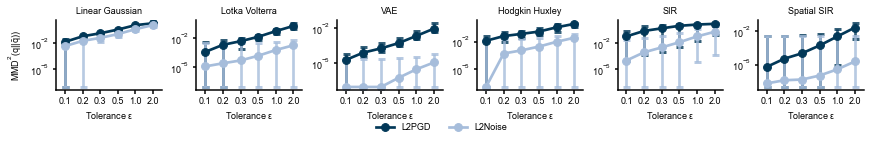

In [4]:
with use_style("pyloric"):
    fig, axes = multi_plot("benchmark", "task", "model_name", plot_rob_tolerance_plot, 
                           model_name="maf",task=task, 
                           figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, verbose=False,hue="attack", N_train=100000, defense="None", legend=False, metric_rob="MMDsquaredRobMetric", color_map=color_map_attack)
    axes[0][0].minorticks_off()
    axes[0,0].set_ylabel("$MMD^2(q||\\tilde{q}))$")
    plt.show()
    fig.savefig("appendix_rob_tol_mmd_maf_attacks.svg", transparent=True)

{'model_name': 'maf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'MMDsquaredRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False}
{'model_name': 'maf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'MMDsquaredRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False}
{'model_name': 'maf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'MMDsquaredRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False}
{'model_name': 'maf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'MMDsquaredRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False}
{'model_name': 'maf', 'defense': 'None', 'task': 'sir', '

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


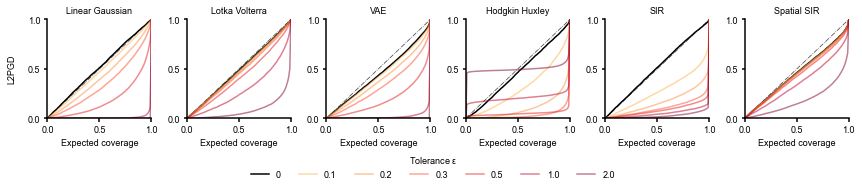

In [5]:

for n in ["maf"]:
    with use_style("pyloric"):
        fig, axes = multi_plot("benchmark", "task", "attack", plot_expected_coverage, model_name=n, defense="None",task=task, figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov + 0.2,
                                with_eps=True, hue="eps", N_train=100000, verbose=False, loss="NLLLoss",  metric_rob="MMDsquaredRobMetric", attack="L2PGDAttack",with_grid=False, legend_bbox_to_anchor=[0.5,-0.2])
        legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
        axes[0,0].minorticks_off()
        plt.show()
        fig.savefig(f"appendix_expected_coverages_mmd_per_attack_{n}.svg")


{'model_name': 'maf', 'task': 'lotka_volterra', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'NLLRobMetric', 'min_clip': -1000, 'yscale': 'symlog'}
{'model_name': 'maf', 'task': 'vae_task', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'NLLRobMetric', 'min_clip': -1000, 'yscale': 'symlog'}
{'model_name': 'maf', 'task': 'hudgkin_huxley', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'NLLRobMetric', 'min_clip': -1000, 'yscale': 'symlog'}
{'model_name': 'maf', 'task': 'sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'NLLRobMetric', 'min_clip': -1000, 'yscale': 'symlog'}
{'model_name': 'maf', 'task': 'spatial_sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'NLLRobMetric', 'min_clip': -1000, 'ysca

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


IndexError: index 5 is out of bounds for axis 1 with size 5

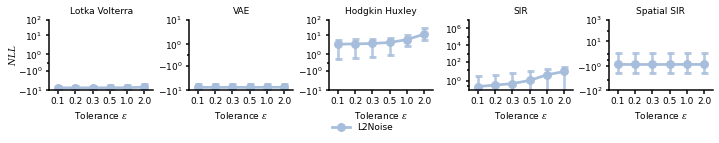

In [6]:
with use_style("pyloric"):
    fig, axes = multi_plot("benchmark", "task", "model_name", plot_rob_tolerance_plot, 
                           model_name="maf",task=task, 
                           figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, verbose=False,hue="attack", N_train=100000, defense="None", legend=False, metric_rob="NLLRobMetric", color_map=color_map_attack, min_clip=-1000, yscale="symlog")
    #axes[0][0].minorticks_off()
    axes[0,0].set_ylabel("$NLL$")
    axes[0,0].set_yticks([-10,-1,1,10, 100])
    axes[0,1].set_yticks([-10,-1,1,10])
    axes[0,2].set_yticks([-10,-1,1,10, 100])
    axes[0,3].set_yticks([1, 100, 10000, 1000000])
    axes[0,3].set_ylim([-1, 10000000])
    axes[0,4].set_yticks([-100,-1,10,1000])
    axes[0,5].set_yticks([-10,-1,1,10])
    plt.show()
    fig.savefig("appendix_rob_tol_NLL_maf_attacks.svg", transparent=True)

{'model_name': 'maf', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'NLLRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'gaussian_linear'}
{'model_name': 'maf', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'NLLRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'lotka_volterra'}
{'model_name': 'maf', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'NLLRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'vae_task'}
{'model_name': 'maf', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'NLLRobMetric', 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'hudgkin_huxley'}
{'model_name': 'maf', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'NLLRobMetric', 'attack': 'L2PGDAttac

/mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/multi_plots.py:259: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


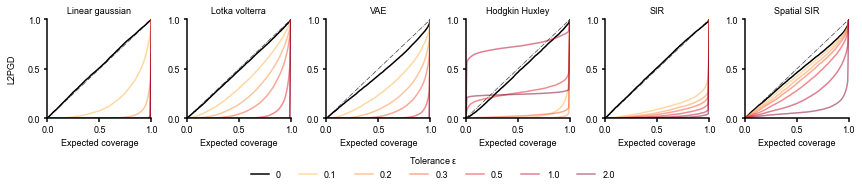

In [ ]:

for n in ["maf"]:
    with use_style("pyloric"):
        fig, axes = multi_plot("benchmark", "task", "attack", plot_expected_coverage, model_name=n, figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov + 0.2,
                                with_eps=True, hue="eps", N_train=100000, verbose=False, loss="NLLLoss",  metric_rob="NLLRobMetric", attack="L2PGDAttack",with_grid=False, legend_bbox_to_anchor=[0.5,-0.2])
        legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
        axes[0,0].minorticks_off()
        plt.show()
        fig.savefig(f"appendix_expected_coverages_NLL_per_attack_{n}.svg")


b'Skipping line 10226: expected 9 fields, saw 17\nSkipping line 22184: expected 9 fields, saw 17\n'


Following data row is used:
Id: c37c31f9-6cb4-4c76-ae12-8d2ae0b56fff, Task: vae_task, Model: maf, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =fc34a40b-5850-459f-9093-ce1a93a5817d, Attack:L2PGDAttack,Attack loss_fn:LogLikelihoodLoss, Metric: NLLRobMetric 


(<Figure size 1000x1000 with 9 Axes>,
 array([[<AxesSubplot:xlabel='dim 0'>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>]],
       dtype=object))

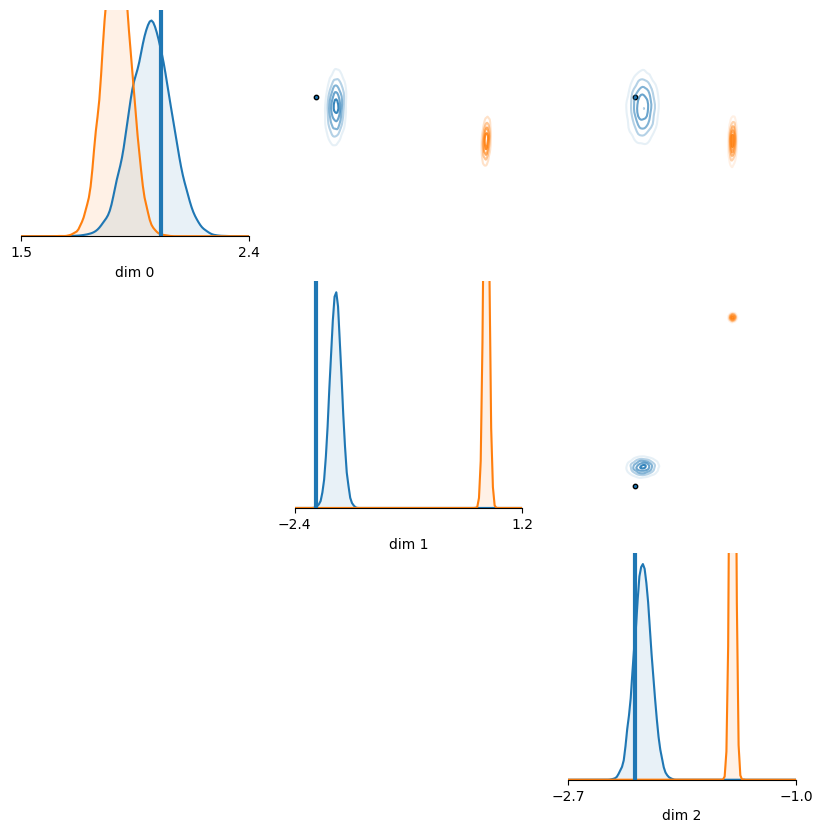

In [ ]:
plot_adversarial_posterior("benchmark", model_name="maf",task="vae_task",  N_train=100000,  metric_rob="NLLRobMetric", attack="L2PGDAttack", eps=2.)

b'Skipping line 10226: expected 9 fields, saw 17\nSkipping line 22184: expected 9 fields, saw 17\n'


Following data row is used:
Id: c37c31f9-6cb4-4c76-ae12-8d2ae0b56fff, Task: vae_task, Model: maf, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =fc34a40b-5850-459f-9093-ce1a93a5817d, Attack:L2PGDAttack,Attack loss_fn:LogLikelihoodLoss, Metric: NLLRobMetric 


(<Figure size 1000x500 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Observation'}>,
         <AxesSubplot:title={'center':'Posterior predictive'}>],
        [<AxesSubplot:title={'center':'Adversarial example'}>,
         <AxesSubplot:title={'center':'Adversarial posterior predictive'}>]],
       dtype=object))

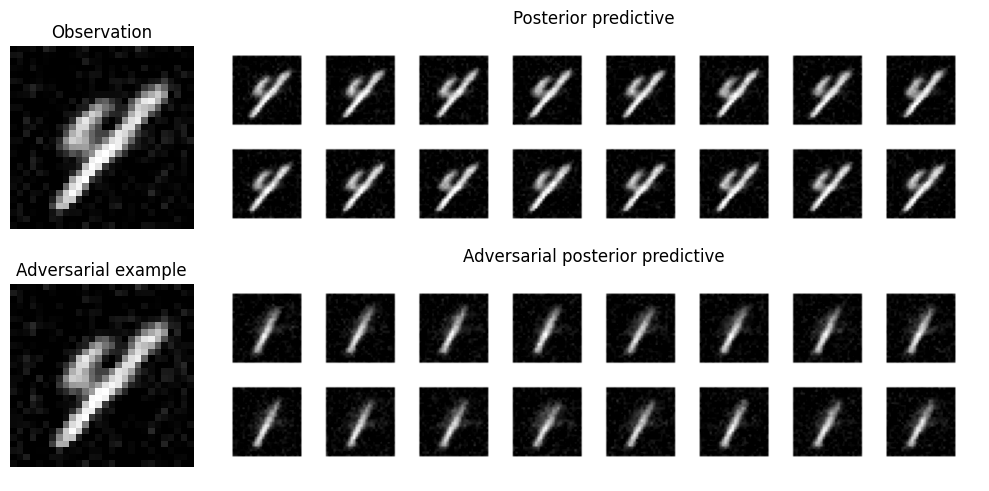

In [ ]:
plot_adversarial_posterior_predictive("benchmark", model_name="maf",task="vae_task", N_train=100000,  metric_rob="NLLRobMetric", attack="L2PGDAttack",  eps=2.)